<a href="https://colab.research.google.com/github/emerson-matos/tcc-notebooks/blob/main/tcc_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
from google.colab import auth
auth.authenticate_user()

In [3]:
import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

In [4]:
ws = gc.open('PGC-hotels')
emerson = ws.worksheet('Emerson')

In [5]:
import pandas as pd

df = pd.DataFrame(emerson.get_all_records())

In [6]:
states = pd.DataFrame({'state': ["AC",
"AL",
"AM",
"AP",
"BA",
"CE",
"DF",
"ES",
"GO",
"MA",
"MG",
"MS",
"MT",
"PA",
"PB",
"PE",
"PI",
"PR",
"RJ",
"RN",
"RO",
"RR",
"RS",
"SC",
"SE",
"SP",
"TO"]})
df[:1]

,done,name,n_reviews,sort_by,hl,state,overall_rating,stars,url,all_inclusive,google_travel,busca
0,0,"""Copacabana Palace, A Belmond Hotel, Rio de Ja...",-1,newest,pt-br,RJ,"4,7",5,https://www.google.com/travel/hotels/Rio%20de%...,0,https://www.google.com/travel/hotels/Rio%20de%...,RJ


In [7]:
import matplotlib.pyplot as plt

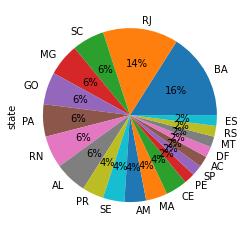

In [18]:
pd.value_counts(df['state']).plot.pie(autopct='%1.0f%%')

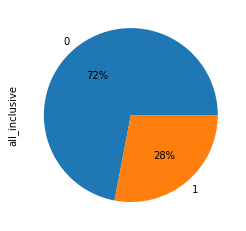

In [19]:
pd.value_counts(df['all_inclusive']).plot.pie(autopct='%1.0f%%')

In [ ]:
df.groupby(['state','stars']).size().unstack().plot(kind='bar', stacked=True)

In [10]:
## estados sem hoteis
set(states.state).symmetric_difference(df.state)

{'AP', 'MS', 'PB', 'PI', 'RO', 'RR', 'TO'}

In [11]:
# df[['state','stars']].join(states.set_index('state'), how='right', on='state').groupby(['state','stars'],dropna= False).size(.unstack().plot(kind='bar', stacked=True)

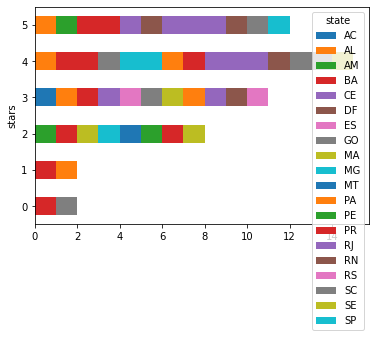

In [12]:
df.groupby(['stars','state']).size().unstack().plot(kind='barh', stacked=True)

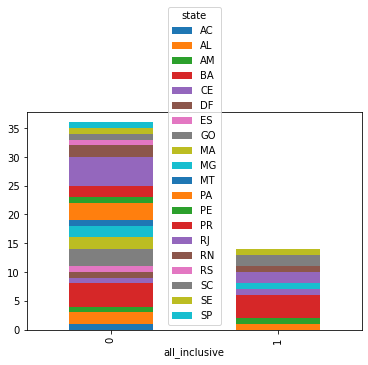

In [13]:
df.groupby(['all_inclusive','state']).size().unstack().plot(kind='bar', stacked=True)

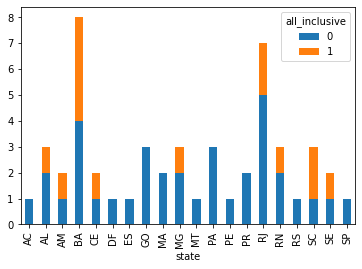

In [14]:
df.groupby(['state','all_inclusive']).size().unstack().plot(kind='bar', stacked=True)